## 6.1 テンソルの計算

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor(5.0)

y = 3 * x ** 2

print(y)

tensor(75.)


In [3]:
x = torch.tensor(5.0, requires_grad=True)

y = 3 * x ** 2

y.backward()

print(x.grad)

tensor(30.)


In [4]:
def rosenbrock(x0, x1):
    return 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2

x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

y = rosenbrock(x0, x1)
y.backward()

print(x0.grad, x1.grad)

tensor(-2.) tensor(400.)


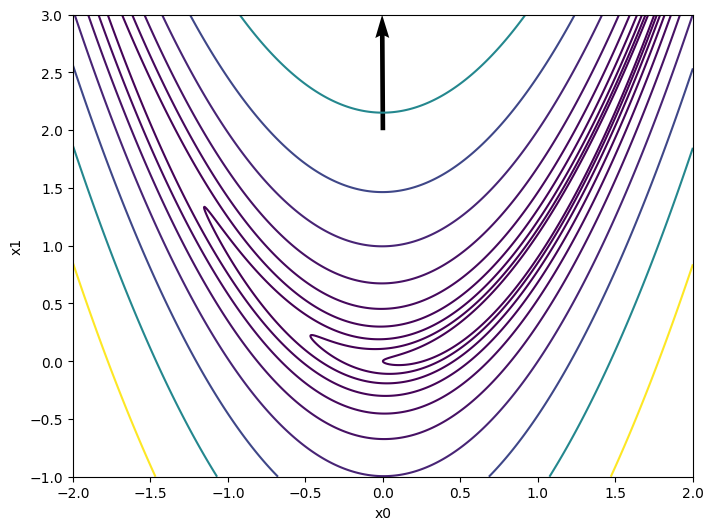

In [5]:
# 勾配の等高線を描画する
x0_np, x1_np = np.meshgrid(np.linspace(-2, 2, 1000), np.linspace(-1, 3, 1000))
y_np = rosenbrock(x0_np, x1_np)

x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)
y = rosenbrock(x0, x1)
y.backward()

grad_vec = torch.tensor([x0.grad, x1.grad])
grad_unit = grad_vec / torch.norm(grad_vec)

plt.figure(figsize=(8, 6))
plt.quiver(x0.detach(), x1.detach(), grad_unit[0].detach(), grad_unit[1].detach(), angles='xy', scale_units='xy', scale=1)
plt.contour(x0_np, x1_np, y_np, levels=np.logspace(0, 3, 10))
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [6]:
# 最小値を勾配法で求める
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

hist = [[x0.item(), x1.item()]]

lr = 0.001
iters = 10000
for i in range(iters):
    if i % 1000 == 0:
        print(x0.item(), x1.item())
    y = rosenbrock(x0, x1)
    y.backward()

    # 値の更新
    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

    if i % 1000 == 0:
        hist.append([x0.item(), x1.item(), y.item()])

    # 勾配の初期化
    x0.grad.zero_()
    x1.grad.zero_()

hist.append([x0.item(), x1.item(), rosenbrock(x0, x1).item()])
print(x0.item(), x1.item(), rosenbrock(x0, x1).item())

0.0 2.0
0.6837119460105896 0.4659528136253357
0.8263181447982788 0.6820318102836609
0.8947840929031372 0.8001903295516968
0.9334872364997864 0.8711214661598206
0.9569892883300781 0.9156519174575806
0.9718162417411804 0.9443121552467346
0.9813804626464844 0.9630323052406311
0.98763507604599 0.9753732085227966
0.9917610883712769 0.983556866645813
0.9944981336593628 0.9890044331550598 3.0319433790282346e-05


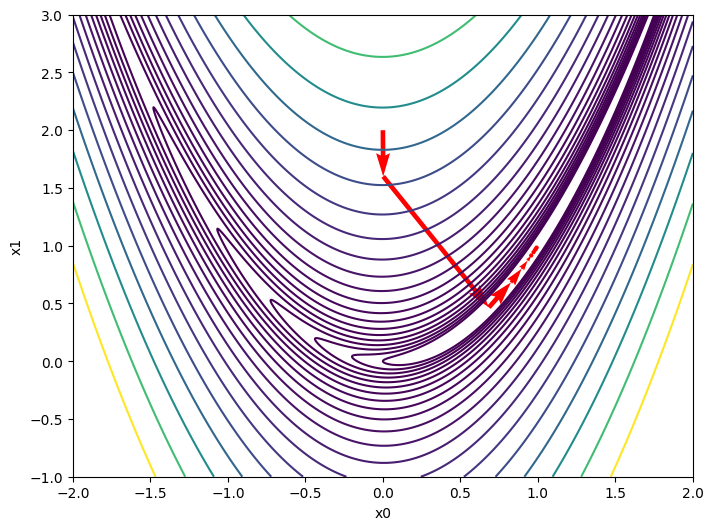

In [9]:
x0_np, x1_np = np.meshgrid(np.linspace(-2, 2, 1000), np.linspace(-1, 3, 1000))
y_np = rosenbrock(x0_np, x1_np)

x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)
y = rosenbrock(x0, x1)
y.backward()

grad_vec = torch.tensor([x0.grad, x1.grad])
grad_unit = grad_vec / torch.norm(grad_vec)

plt.figure(figsize=(8, 6))
plt.contour(x0_np, x1_np, y_np, levels=np.logspace(0, 3, 20))
for i in range(1, len(hist)):
    plt.quiver(hist[i - 1][0], hist[i - 1][1], hist[i][0] - hist[i - 1][0], hist[i][1] - hist[i - 1][1], angles='xy', scale_units='xy', scale=1, color='red')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

## 線形回帰

In [12]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

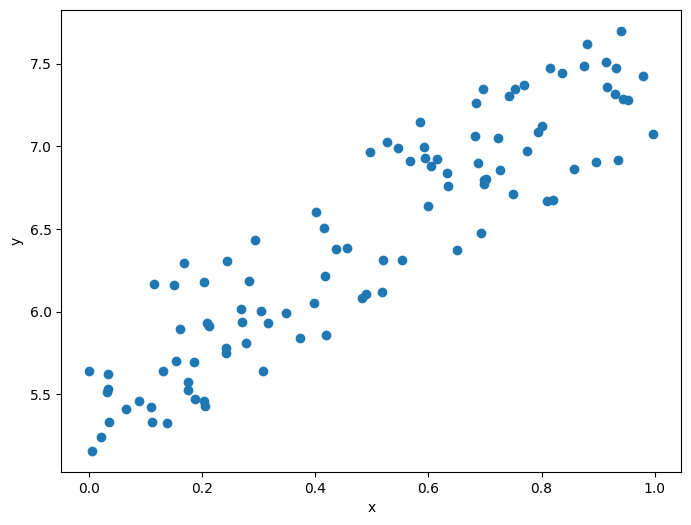

In [13]:
# トイデータセットの作成
torch.manual_seed(0)

x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
W = torch.zeros((1, 1), requires_grad=True) # 重み:(1, 1)
b = torch.zeros(1, requires_grad=True) # バイアス:(1)

def pred(x):
    y = x @ W + b
    return y

def mse(x0, x1):
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff ** 2) / N

lr = 0.1
iters = 1000

for i in range(iters):
    y_hat = pred(x)
    # loss = mse(y, y_hat)
    loss = F.mse_loss(y_hat, y)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 100 == 0:
        print(loss.item())

print(loss.item())
print("="*40)
print(f"W = {W.item():.3f}, b = {b.item():.3f}")

41.89796447753906
0.07983382046222687
0.07840423285961151
0.0783131867647171
0.0783073678612709
0.07830700278282166
0.07830697298049927
0.07830698788166046
0.07830698788166046
0.07830698788166046
0.07830698788166046
W = 2.154, b = 5.384


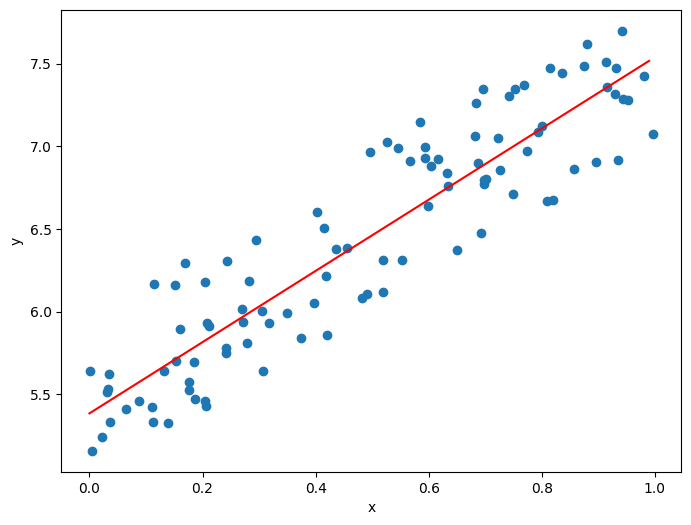

In [18]:
xs = np.arange(0, 1, 0.01)
w_np = W.detach().numpy().reshape(-1)
b_np = b.detach().numpy().reshape(-1)

ys = w_np * xs + b_np

plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy())
plt.plot(xs, ys, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 6.3 パラメータとオプティマイザ

In [19]:
import torch
import torch.nn as nn

In [20]:
W = nn.Parameter(torch.zeros((1, 1))) # 重み:(1, 1)
b = nn.Parameter(torch.zeros(1)) # バイアス:(1)

print(W)
print(b)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [23]:
class Model(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size) # nn.lenear(入力するベクトルの次元数, 出力するベクトルの次元数)

    def forward(self, x):
        y = self.linear(x)
        return y

model = Model()

for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.7559]], requires_grad=True)
Parameter containing:
tensor([-0.6865], requires_grad=True)


In [24]:
# トイデータセットの作成
torch.manual_seed(0)
x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

lr = 0.1
iters = 1000

model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr) # 最適化手法の選択

for i in range(iters):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print(loss.item())

33.76302719116211
0.07878139615058899
0.07833719998598099
0.07830892503261566
0.07830709964036942
0.07830698788166046
0.07830695807933807
0.07830698043107986
0.07830698788166046
0.07830698788166046


## 6.4 NNの実装

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

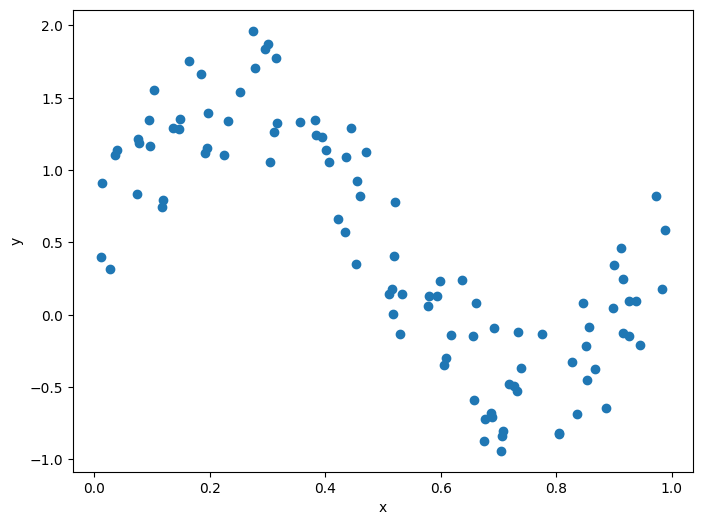

In [39]:
torch.manual_seed(123)

x = torch.rand(100, 1)
y = torch.sin(2 * np.pi * x) + torch.rand(100, 1)

plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [45]:
class Model(nn.Module):
    def __init__(self, input_size=1, hidden_size=10, output_size=1):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h = F.sigmoid(self.l1(x))
        y = self.l2(h)
        return y

In [46]:
lr = 0.2
iters = 10000

model = Model() 
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:
        print(loss.item())

print(loss.item())

1.369407057762146
0.2668362855911255
0.23505540192127228
0.18110576272010803
0.10255026072263718
0.08828990906476974
0.08721669018268585
0.09314513206481934
0.08629835397005081
0.0859893411397934
0.08570606261491776


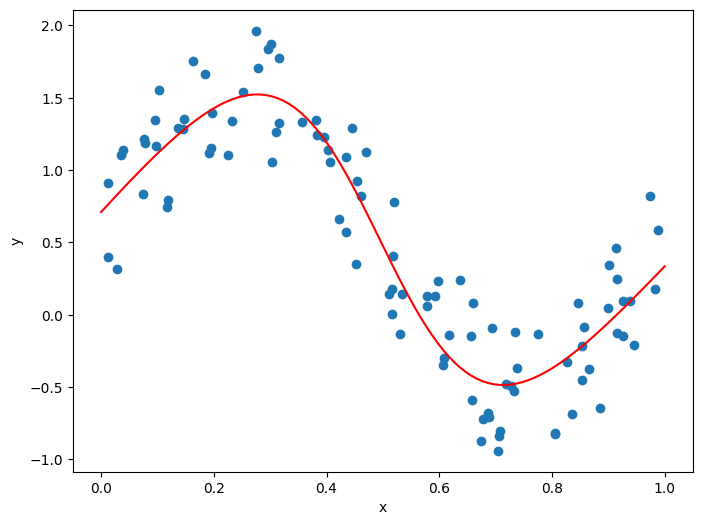

In [47]:
torch.manual_seed(123)

x = torch.rand(100, 1)
y = torch.sin(2 * np.pi * x) + torch.rand(100, 1)

xs = torch.linspace(0, 1, 100).view(-1, 1)
ys = model(xs)

plt.figure(figsize=(8, 6))
plt.scatter(x.numpy(), y.numpy())
plt.plot(xs.numpy(), ys.detach().numpy(), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 6.5 torchvisionとデータセット

In [50]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

100%|██████████| 9912422/9912422 [00:01<00:00, 6459543.94it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 1110450.32it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 5666125.44it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4531524.45it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

size: 60000
type: <class 'PIL.Image.Image'>
label: 5


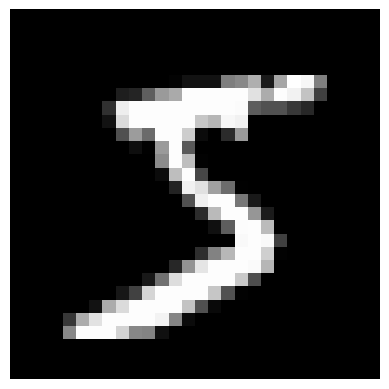

In [49]:
dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=None
)

x, label = dataset[0]

print('size:', len(dataset))
print('type:', type(x))
print('label:', label)

plt.imshow(x, cmap='gray')
plt.axis('off')
plt.show()

In [51]:
transform = transforms.ToTensor() # PIL画像をテンソルに変換

dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform # ここで変換を指定
)

x, label = dataset[0]

print('size:', len(dataset))
print('type:', type(x))
print('shape:', x.shape)

size: 60000
type: <class 'torch.Tensor'>
shape: torch.Size([1, 28, 28])


In [53]:
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=32,
    shuffle=True # エポックごとにデータをシャッフル
)

for x, label in dataloader:
    print(x.shape, label.shape)
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])
